In [12]:
from app.simulator import Simulator
import numpy as np

# Basiswerte
K = 3
J = 4
t = np.linspace(0, 365, 365)

# Parameter - t[-1] statt len(t), da der Endwert wichtig ist und nicht die Größe von t
beta_asym   = np.ones((int(t[-1]), J, K, K)) * 0.7
beta_sym    = np.ones((int(t[-1]), J, K, K)) * 0.3
beta_sev    = np.ones((int(t[-1]), J, K, K)) * 0.05
gamma_asym  = np.ones((int(t[-1]), J, K)) * 0.1
gamma_sym   = np.ones((int(t[-1]), J, K)) * 1 / 12.5
gamma_sev   = np.ones((int(t[-1]), J, K)) * 0.05
gamma_sev_r = np.ones((int(t[-1]), J, K)) * 0.075
gamma_sev_d = np.ones((int(t[-1]), J, K)) * 0.1
epsilon     = np.ones((int(t[-1]), J, K)) * 0.125
psi         = np.ones((int(t[-1]), J, K)) * np.array([0.5, 0.3, 0.25])
psi[0:180, :, :] = 0
sigma       = np.ones((int(t[-1]), J, K)) * np.array([0.002, 0.025, 0.10])
my_sym      = np.ones((int(t[-1]), J, K)) * 0.4
my_sev      = np.ones((int(t[-1]), J, K)) * 0.01
tau_asym    = np.ones((int(t[-1]), J, K)) * 0.001
tau_sev     = np.ones((int(t[-1]), J, K)) * 0.25
tau_sym     = np.ones((int(t[-1]), J, K)) * 0.01
rho_mat     = np.ones((int(t[-1]), J, K)) * np.array([1 / 180, 0, 0])
rho_vac     = np.ones((int(t[-1]), J, K)) * 1 / 270
rho_rec     = np.ones((int(t[-1]), J, K)) * 1 / 90
nu          = np.ones((int(t[-1]), J, K))
nu[0:125, :, :]     = nu[0:125, :, :] * 100000 / 83000000
nu[126:250, :, :]   = nu[126:250, :, :] * 300000 / 83000000
nu[251:365, :, :]   = nu[251:365, :, :] * 200000 / 83000000

# Stammdaten - werden aus .csv-Dateien eingelesen / json-Dateien eingelesen
N           = np.array([[50000, 150000, 100000], [10000, 22000, 10000], [15000, 17000, 20000], [150000, 300000, 100000]])
B           = np.sum(N, axis=1) * 0.025

# Basiswerte - müssen zur Simulation gesetzt werden
Etr         = np.zeros((J, K))
Ent         = np.zeros((J, K))
Iasym       = np.array([[50, 500, 450], [25, 175, 100], [25, 100, 175], [500, 1500, 1000]])
Isym        = Iasym * 0.5
Isev        = Iasym * 0.05
Qasym       = np.zeros((J, K))
Qsym        = np.zeros((J, K))
Qsev        = np.zeros((J, K))
R0          = np.ones((J,K)) * 1.2 # 1.2 = Basisreproduktionszahl aus Daten des RKI / Statista
D0          = np.zeros((J,K))
V0          = np.zeros((J,K))
M0          = np.zeros((J,K))
S0          = N - Etr - Ent - Iasym - Isym - Isev - Qasym - Qsym - Qsev - D0 - V0 - R0

params = {
    "J": J,
    "K": K,
    "N": N,
    "t": t,
    "N_total": np.sum(N, axis=1),
    "B": B,
    "M": M0,
    "S": S0,
    "V": V0,
    "E_tr": Etr,
    "E_nt": Ent,
    "I_asym": Iasym,
    "I_sym": Isym,
    "I_sev": Isev,
    "Q_asym": Qasym,
    "Q_sym": Qsym,
    "Q_sev": Qsev,
    "R": R0,
    "D": D0,
    "sigma": sigma,
    "rho_mat": rho_mat,
    "rho_vac": rho_vac,
    "rho_rec": rho_rec,
    "nu": nu,
    "beta_asym": beta_asym,
    "beta_sym": beta_sym,
    "beta_sev": beta_sev,
    "psi": psi,
    "epsilon": epsilon,
    "gamma_asym": gamma_asym,
    "gamma_sym": gamma_sym,
    "gamma_sev": gamma_sev,
    "gamma_sev_r": gamma_sev_r,
    "gamma_sev_d": gamma_sev_d,
    "my_sym": my_sym,
    "my_sev": my_sev,
    "tau_asym": tau_asym,
    "tau_sym": tau_sym,
    "tau_sev": tau_sev,
}

sim = Simulator()

M, V, S, E_tr, E_nt, I_asym, I_sym, I_sev, Q_asym, Q_sym, Q_sev, R, D = sim.run(params, "full")

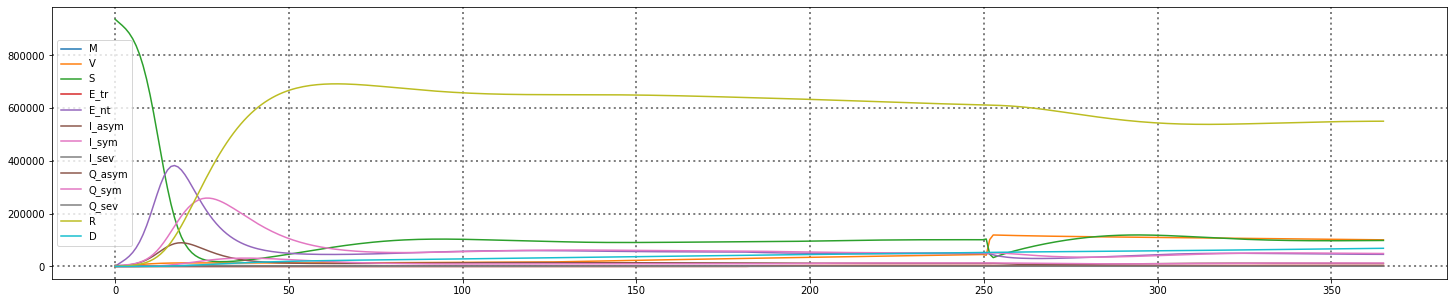

In [13]:
import matplotlib
import matplotlib.pyplot as plt

colors = list(matplotlib.colors.TABLEAU_COLORS.values())

fig, ax = plt.subplots(figsize=(25, 5))
ax.grid(linestyle=':', linewidth=2.0, color='#808080')
ax.plot(t, np.sum(M, axis=(1,2)), colors[0], label='M')
ax.plot(t, np.sum(V, axis=(1,2)), colors[1], label='V')
ax.plot(t, np.sum(S, axis=(1,2)), colors[2], label='S')
ax.plot(t, np.sum(E_tr, axis=(1,2)), colors[3], label='E_tr')
ax.plot(t, np.sum(E_nt, axis=(1,2)), colors[4], label='E_nt')
ax.plot(t, np.sum(I_asym, axis=(1,2)), colors[5], label='I_asym')
ax.plot(t, np.sum(I_sym, axis=(1,2)), colors[6], label='I_sym')
ax.plot(t, np.sum(I_sev, axis=(1,2)), colors[7], label='I_sev')
ax.plot(t, np.sum(Q_asym, axis=(1,2)), colors[5], label='Q_asym')
ax.plot(t, np.sum(Q_sym, axis=(1,2)), colors[6], label='Q_sym')
ax.plot(t, np.sum(Q_sev, axis=(1,2)), colors[7], label='Q_sev')
ax.plot(t, np.sum(R, axis=(1,2)), colors[8], label='R')
ax.plot(t, np.sum(D, axis=(1,2)), colors[9], label='D')
ax.legend(loc='best')
plt.show()